Loading and Preprocess the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
file_path = "C:/Users/91707/Downloads/ADANIPORTS.csv"
data = pd.read_csv(file_path)

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]  # Focus on the 'Close' price for forecasting

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


Designing and Training the Neural Network Model

In [2]:
# LSTM (Long Short-Term Memory)
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model_lstm.fit(X_train, y_train, epochs=25, batch_size=32)



Epoch 1/25

82/82 [==============================] - 19s 95ms/step - loss: 0.0040
Epoch 2/25
82/82 [==============================] - 7s 82ms/step - loss: 0.0011
Epoch 3/25
82/82 [==============================] - 7s 88ms/step - loss: 8.4251e-04
Epoch 4/25
82/82 [==============================] - 7s 89ms/step - loss: 7.5529e-04
Epoch 5/25
82/82 [==============================] - 7s 83ms/step - loss: 7.6461e-04
Epoch 6/25
82/82 [==============================] - 7s 89ms/step - loss: 7.1211e-04
Epoch 7/25
82/82 [==============================] - 7s 82ms/step - loss: 6.2207e-04
Epoch 8/25
82/82 [==============================] - 7s 87ms/step - loss: 5.4868e-04
Epoch 9/25
82/82 [==============================] - 7s 85ms/step - loss: 5.1629e-04
Epoch 10/25
82/82 [==============================] - 7s 90ms/step - loss: 4.7237e-04
Epoch 11/25
82/82 [==============================] - 6s 78ms/step - loss: 5.2041e-04
Epoch 12/25
82/82 [==============================] - 7s 84ms/step - loss: 4.40

Fully Connected Neural Network

In [3]:
from tensorflow.keras.layers import Flatten, Dense

model_fc = Sequential()
model_fc.add(Dense(units=50, input_dim=seq_length, activation='relu'))
model_fc.add(Dense(units=50, activation='relu'))
model_fc.add(Dense(units=1))

model_fc.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
model_fc.fit(X_train_flat, y_train, epochs=25, batch_size=32)


Epoch 1/25
82/82 [==============================] - 2s 5ms/step - loss: 0.0094
Epoch 2/25
82/82 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 3/25
82/82 [==============================] - 0s 5ms/step - loss: 7.6795e-04
Epoch 4/25
82/82 [==============================] - 0s 4ms/step - loss: 6.2085e-04
Epoch 5/25
82/82 [==============================] - 0s 4ms/step - loss: 5.7977e-04
Epoch 6/25
82/82 [==============================] - 0s 5ms/step - loss: 4.8063e-04
Epoch 7/25
82/82 [==============================] - 0s 5ms/step - loss: 4.7398e-04
Epoch 8/25
82/82 [==============================] - 0s 5ms/step - loss: 4.6109e-04
Epoch 9/25
82/82 [==============================] - 0s 5ms/step - loss: 4.3271e-04
Epoch 10/25
82/82 [==============================] - 0s 5ms/step - loss: 6.2309e-04
Epoch 11/25
82/82 [==============================] - 0s 5ms/step - loss: 4.1460e-04
Epoch 12/25
82/82 [==============================] - 0s 4ms/step - loss: 3.6222e-04
Epoch 13/

Experiment with Different Configurations

In [4]:
# Using different activation functions and optimizers
model_lstm_alt = Sequential()
model_lstm_alt.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model_lstm_alt.add(LSTM(units=50, return_sequences=False))
model_lstm_alt.add(Dense(units=1))
model_lstm_alt.compile(optimizer='sgd', loss='mean_squared_error')  # Using SGD optimizer
model_lstm_alt.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
82/82 [==============================] - 11s 31ms/step - loss: 0.0251
Epoch 2/25
82/82 [==============================] - 2s 28ms/step - loss: 0.0168
Epoch 3/25
82/82 [==============================] - 2s 26ms/step - loss: 0.0124
Epoch 4/25
82/82 [==============================] - 2s 26ms/step - loss: 0.0088
Epoch 5/25
82/82 [==============================] - 2s 26ms/step - loss: 0.0059
Epoch 6/25
82/82 [==============================] - 2s 28ms/step - loss: 0.0039
Epoch 7/25
82/82 [==============================] - 2s 28ms/step - loss: 0.0026
Epoch 8/25
82/82 [==============================] - 2s 28ms/step - loss: 0.0019
Epoch 9/25
82/82 [==============================] - 2s 30ms/step - loss: 0.0016
Epoch 10/25
82/82 [==============================] - 2s 28ms/step - loss: 0.0015
Epoch 11/25
82/82 [==============================] - 3s 32ms/step - loss: 0.0015
Epoch 12/25
82/82 [==============================] - 2s 28ms/step - loss: 0.0015
Epoch 13/25
82/82 [=================

Make Predictions and Visualize Results

21/21 [==============================] - 0s 9ms/step


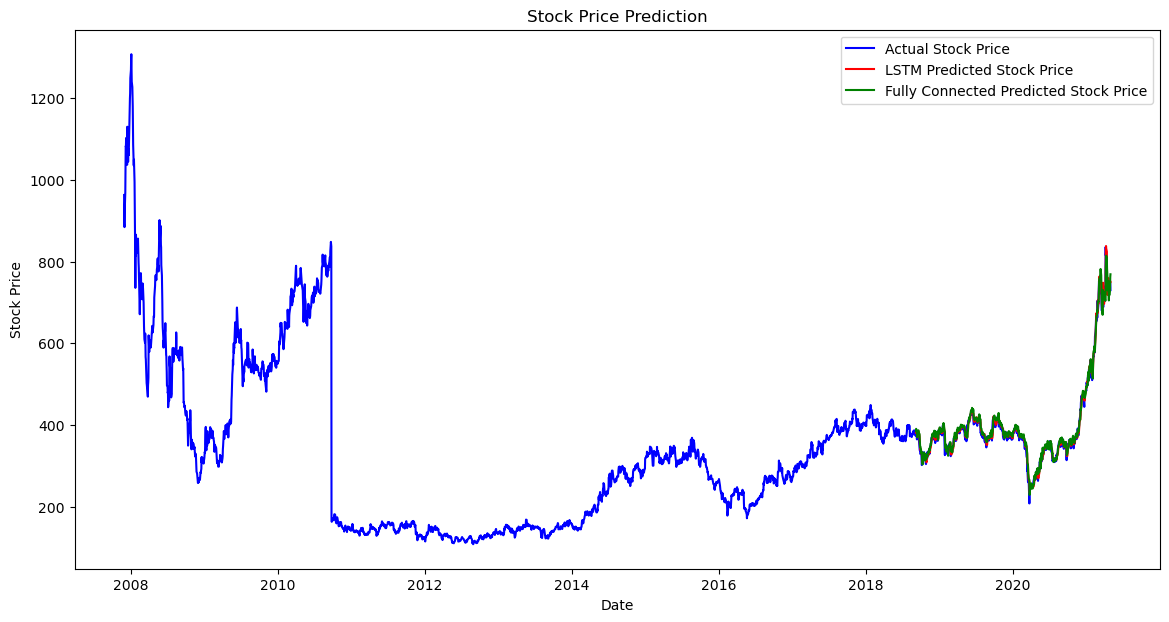

In [5]:
# Make predictions
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

predictions_fc = model_fc.predict(X_test_flat)
predictions_fc = scaler.inverse_transform(predictions_fc)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], color='blue', label='Actual Stock Price')
plt.plot(data.index[-len(predictions_lstm):], predictions_lstm, color='red', label='LSTM Predicted Stock Price')
plt.plot(data.index[-len(predictions_fc):], predictions_fc, color='green', label='Fully Connected Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()